# Time Series Modeling

## First - Data Set Up

Data is Bitcoin data at 1-min intervals from select exchanges, Jan 2012 to March 2021 - [source](https://www.kaggle.com/mczielinski/bitcoin-historical-data)

(download the file into the data folder for this to work properly - note, the file changes constantly so you may need to adjust the name)

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller

import pmdarima as pm
from pmdarima import model_selection
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose

In [2]:
# http://alkaline-ml.com/pmdarima/
# !pip install pmdarima

In [3]:
# Read df
df = pd.read_csv('data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

In [4]:
# Check the shape of the data
df.shape

(4857377, 8)

In [5]:
# Check the first 10 rows...
df.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1325318220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1325318280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1325318340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1325318400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1325318460,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Woah! Nulls! Is that going to be a problem?
df.isna().sum()
# 1243608 / 4857377

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [7]:
# Before worrying about nulls, let's change the timestamp
# By setting unit to seconds, we get the date from the unix time
df["Timestamp"] = pd.to_datetime(df["Timestamp"], unit='s')

In [8]:
# Let's go ahead and set the index to be a datetime index
df.set_index('Timestamp', inplace=True)

In [9]:
# Now let's look at how that impacted the time/index
df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
2021-03-31 00:00:00,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


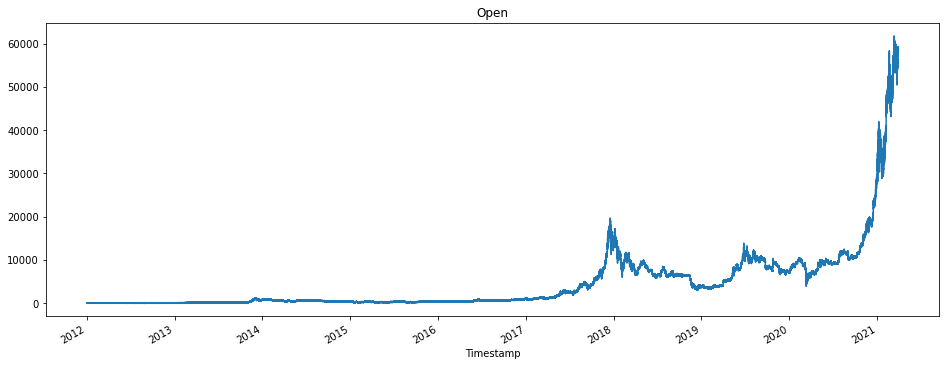

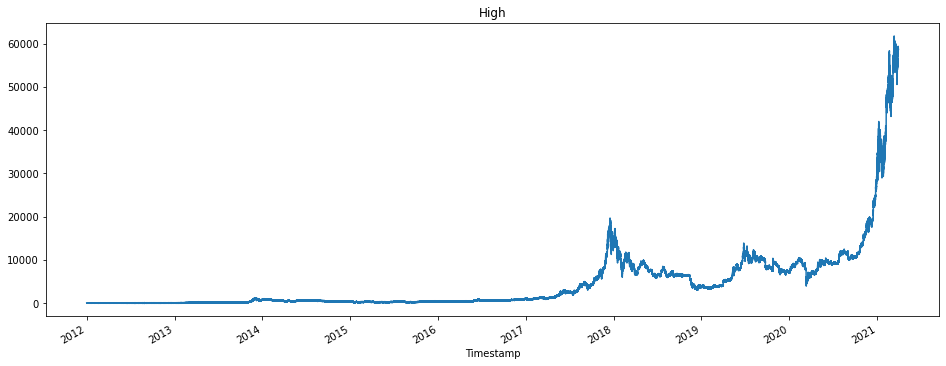

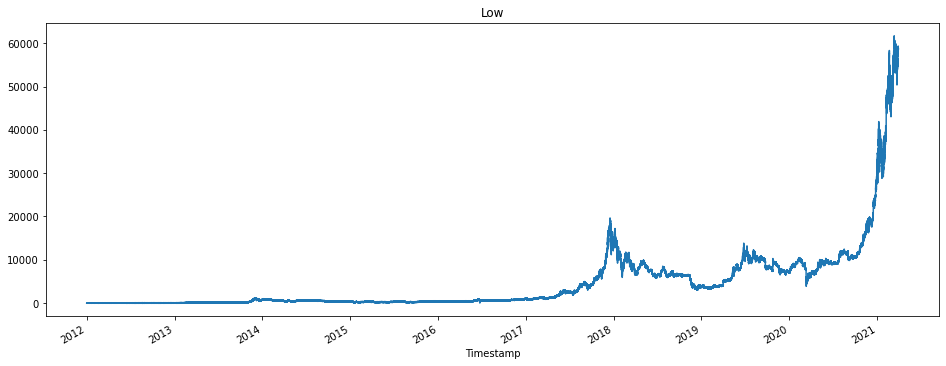

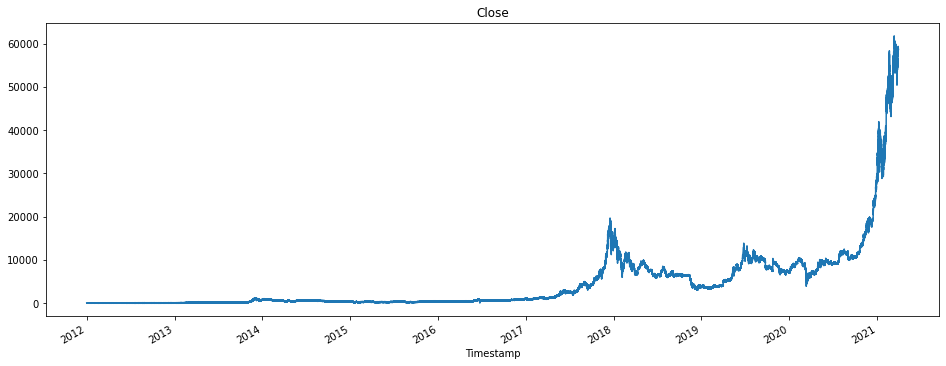

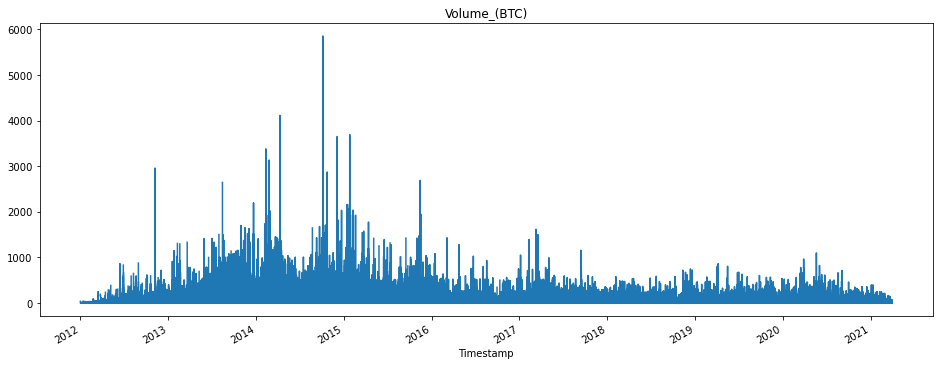

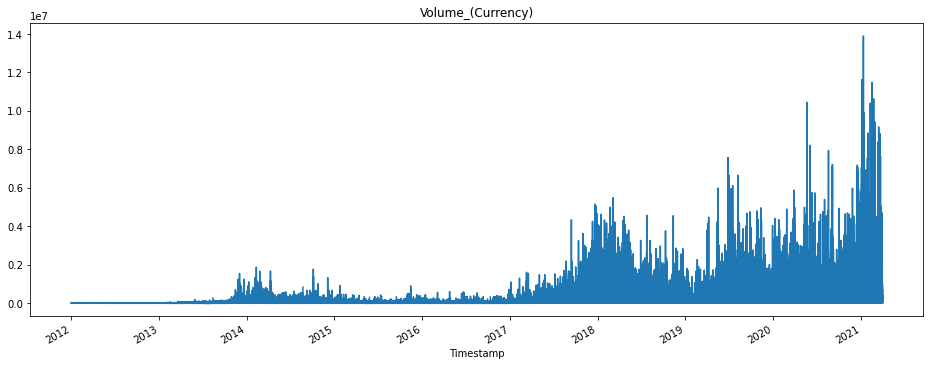

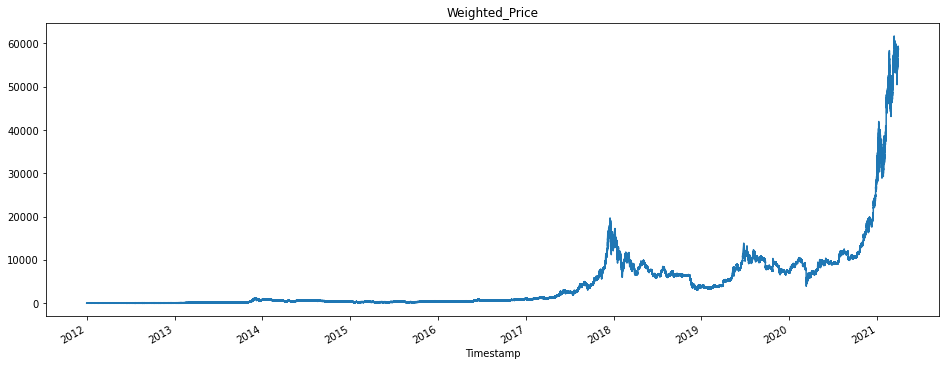

In [11]:
# Let's visualize all of our columns, to get a sense of the data
for col in df.columns:
    plt.figure(figsize=(16,6))
    df[col].plot()
    plt.title(col)
    plt.show()

So we can see the general trends in our data, and we can see that, if those nulls are having an impact, it's not apparent in the plot!

Regarding the Open / High / Low / Close plots - do you see much of a difference?

Also! This is why we change our data to use the datetime object as the index - makes EVERYTHING easier!

## Changing the frequency of our data 

Also called downsampling or upsampling, depending on whether you're going to a less frequent or more frequent point in time.

[Here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling) is a reference for resampling based on time frequency. (you can find the actual codes you can use as arguments in the resample function [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects)).

In [12]:
# Downsampling to a daily cadence
df_daily = df.resample('D').mean()

In [13]:
df_daily.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159


In [14]:
# Let's check if we still have any nulls
df_daily.isna().sum()

Open                 3
High                 3
Low                  3
Close                3
Volume_(BTC)         3
Volume_(Currency)    3
Weighted_Price       3
dtype: int64

In [15]:
# Looking into where those nulls are...
df_daily.loc[df_daily['Open'].isna() == True]

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2015-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN


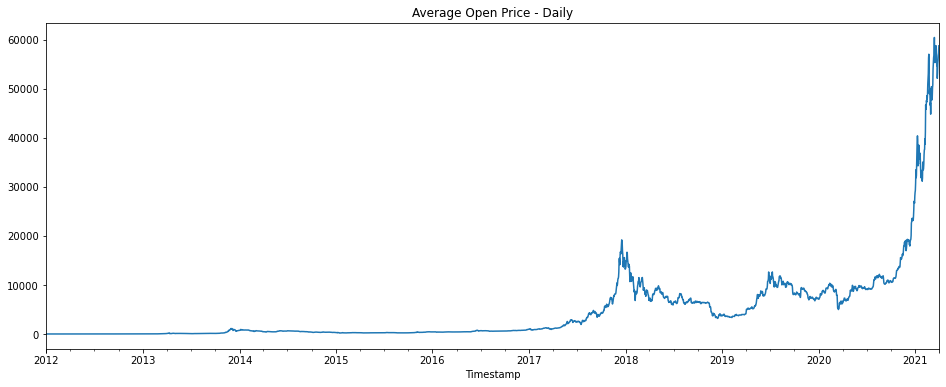

In [16]:
# Let's visualize just one column to see what changed on a daily scale
plt.figure(figsize=(16,6))
df_daily['Open'].plot()
plt.title('Average Open Price - Daily')
plt.show()

I don't see much of a change, just fewer data points - it's probably safe to say that we didn't lose much data by downsampling to a daily mean.

But what about downsampling to monthly?

In [17]:
# Here we're downsampling to month end, denoted by 'M'
# If we wanted month start, we could use 'MS'
df_monthly = df.resample('M').mean()
df_monthly.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-31,6.345389,6.348982,6.341218,6.346148,4.031777,25.168238,6.345955
2012-02-29,5.230208,5.231646,5.227036,5.228510,8.313993,42.239422,5.228443
2012-03-31,4.985481,4.986695,4.982580,4.983828,15.197791,76.509751,4.984397
2012-04-30,4.995171,4.996447,4.993763,4.995079,21.683913,108.218094,4.995091


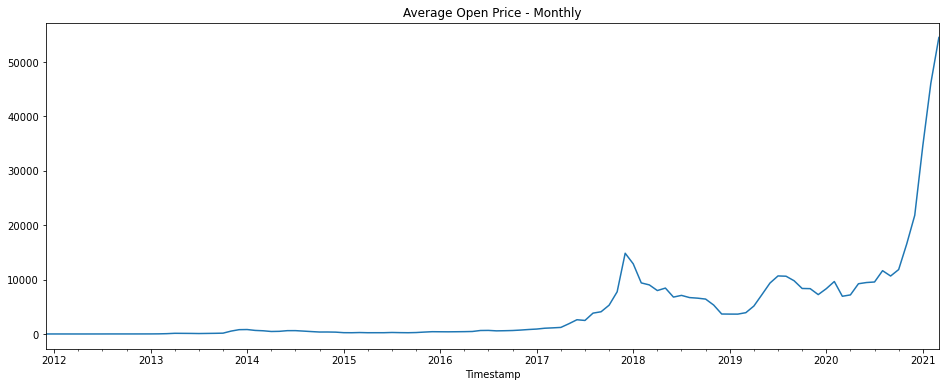

In [18]:
# Again, visualizing the Average Opening price
plt.figure(figsize=(16,6))
df_monthly['Open'].plot()
plt.title('Average Open Price - Monthly')
plt.show()

And what about quarterly?

In [19]:

df_quarterly = df.resample('Q').mean()
df_quarterly.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-03-31,5.477714,5.479719,5.474339,5.476768,9.473001,49.282894,5.476890
2012-06-30,5.587766,5.589126,5.586414,5.587763,27.063281,155.714638,5.587793
2012-09-30,10.327893,10.332271,10.322662,10.326911,19.446149,197.766814,10.327578
2012-12-31,11.987362,11.989673,11.984587,11.986864,22.819409,275.620682,11.986756


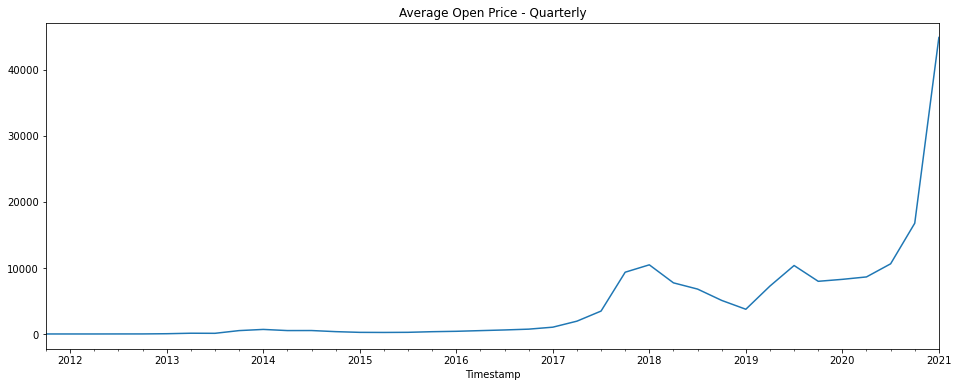

In [20]:
# Again, visualizing the Average Opening price
plt.figure(figsize=(16,6))
df_quarterly['Open'].plot()
plt.title('Average Open Price - Quarterly')
plt.show()

So, as would make sense, as you change the frequency of your data it changes the granularity (level of detail) that's conveyed.

Before we move forward, let's grab a single year from this data, 2017, at the daily frequency to explore.

In [21]:
df_2017 = df[df.index.year == 2017]

In [22]:
df_2017_daily = df_2017.resample('D').mean()

In [23]:
df_2017_daily.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2017-01-01,981.624554,981.844649,981.412414,981.657848,8.145771,8043.688532,981.637688
2017-01-02,1013.247472,1013.553336,1012.905821,1013.255191,6.950963,7041.342115,1013.199484
2017-01-03,1019.997196,1020.272846,1019.743823,1020.044834,7.722734,7881.478595,1019.992995
2017-01-04,1079.605297,1080.397382,1078.508564,1079.599514,16.650546,18123.277962,1079.434027
2017-01-05,1039.859226,1041.248765,1038.236525,1039.794196,26.799748,26943.005600,1039.655397


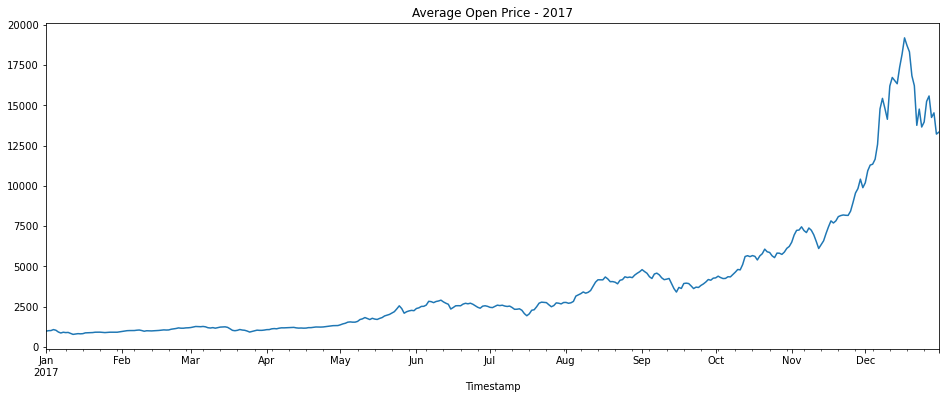

In [24]:
# Again, visualizing the Average Opening price
plt.figure(figsize=(16,6))
df_2017_daily['Open'].plot()
plt.title('Average Open Price - 2017')
plt.show()

## Stationarity

Introduction to stationarity from [_Forecasting: Principles and Practice_](https://otexts.com/fpp2/stationarity.html):

> "A stationary time series is one whose properties do not depend on the time at which the series is observed.14 Thus, time series with trends, or with seasonality, are not stationary — the trend and seasonality will affect the value of the time series at different times. On the other hand, a white noise series is stationary — it does not matter when you observe it, it should look much the same at any point in time.
>
> "Some cases can be confusing — a time series with cyclic behaviour (but with no trend or seasonality) is stationary. This is because the cycles are not of a fixed length, so before we observe the series we cannot be sure where the peaks and troughs of the cycles will be.
>
> "In general, a stationary time series will have no predictable patterns in the long-term. Time plots will show the series to be roughly horizontal (although some cyclic behaviour is possible), with constant variance."

And here's a [useful blog post](https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322) on the subject, where I found the below demonstrative image:

![Examples of stationary and non-stationary processes, from the above medium blog](https://miro.medium.com/max/1400/1*tkx0_wwQ2JT7pSlTeg4yzg.png)

In [25]:
# Let's  get the rolling mean and rolling standard deviation, for the 
# opening price, using a 5-day window

roll_mean = df_2017_daily['Open'].rolling(window=5, center=False).mean()
roll_std = df_2017_daily['Open'].rolling(window=5, center=False).std()

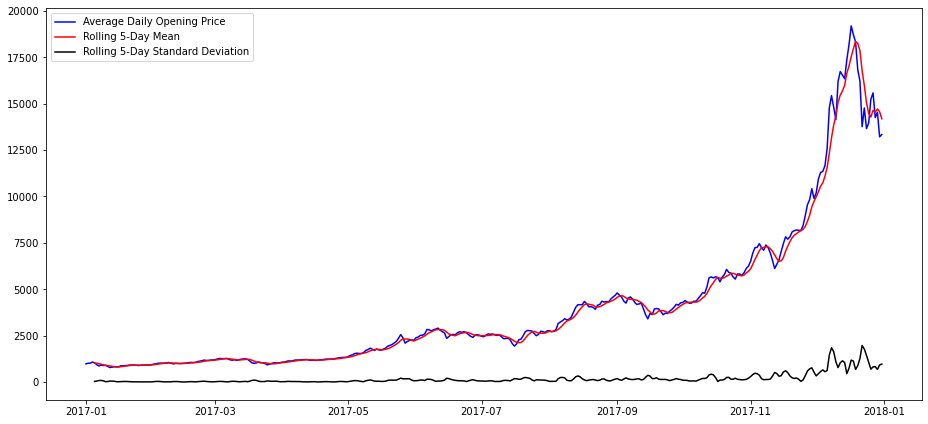

In [26]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_2017_daily['Open'], color='blue',label='Average Daily Opening Price')
ax.plot(roll_mean, color='red', label='Rolling 5-Day Mean')
ax.plot(roll_std, color='black', label='Rolling 5-Day Standard Deviation')
ax.legend()
fig.tight_layout()

Do you think this data is stationary? Why or why not?

 - 
 

There's a test for this!

> **Augumented Dickey-Fuller test**: a hypothesis test, where we reject the null hypothesis (that a time series is non-stationary) if the test-statistic is less than the critical value

[Documentation](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html) for the Dickey-Fuller test in StatsModels

So let's write out our null and alternative hypotheses (remember these??):

Ho = 

Ha = 

In [27]:
# Feed in our Open column, since the test function expects a series:
adfuller(df_2017_daily['Open'])

(2.5051856427613566,
 0.999051503616724,
 16,
 348,
 {'1%': -3.4492815848836296,
  '5%': -2.8698813715275406,
  '10%': -2.5712138845950587},
 4840.545148356987)

Let's interpret the output of this test:

- 


In [76]:
# Now that we've determined whether the data is stationary, let's decompose it

# Using the decompose function from pmdarima
# Need to feed it an array, hence the .values attribute
decomposed = decompose(df_2017_daily['Open'].values, 'additive', m=7)

# M? See this: https://alkaline-ml.com/pmdarima/tips_and_tricks.html#period

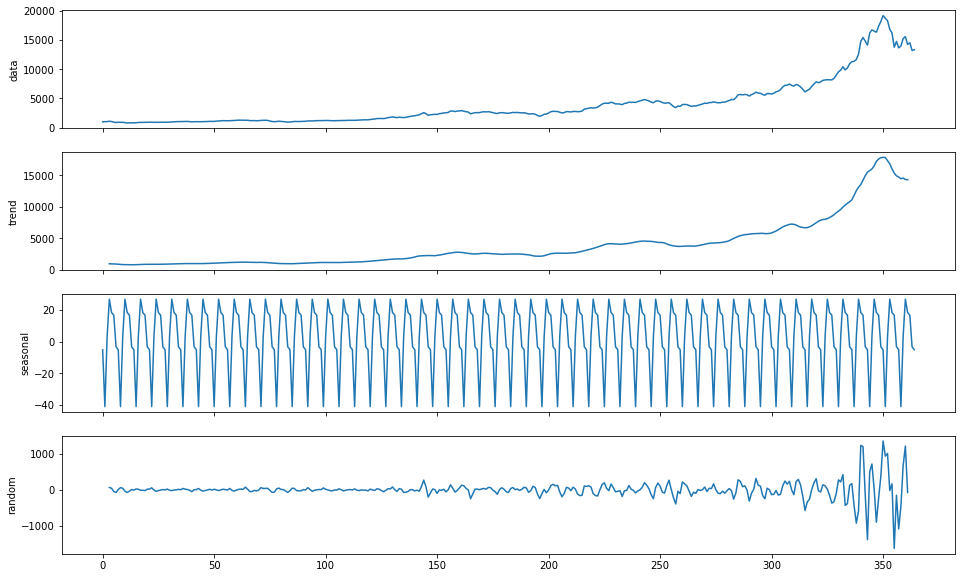

In [77]:
# Plotting the pieces using the arima model again
decomposed_plot(decomposed, figure_kwargs={'figsize': (16, 10)})
plt.show()

From the documentation for `pmdarima`'s decompose:: 

> So what is happening when we call `decomposed`?
> 1) The trend is extracted from the signal via a convolution using either a
   SMA or a user-defined filter.
>   
> 2) We remove the effects of the trend from the original signal by either
   subtracting its effects or dividing out its effects for 'additive' or
   'multiplicative' types of decompositions, respectively. We then take the
   mean across all seasons to get the values for a single season. For m=4, we
   expect 4 values for a single season.
>
> 3) We then create the seasonal series by replicating the single season
   until it is the same length of the trend signal.
>
> 4) Lastly to get the random/noise elements of the signal we remove the effects
   of both the trend and seasonal series and we are now left with the
   variation of the original signal that is neither explainable by seasonal
   nor trend effects.
>
> This logic produces a named tuple of the original signal, trend, seasonal, and random components. It is this named tuple that is passed to `decomposed_plot`

#### Additive vs Multiplicative?

It's in the trends of the plots: 

| Additive Example | Multiplicative Example |
| ---------------- | ---------------------- |
| ![from the pmdarima documentation: additive example](images/sphx_glr_example_seasonal_decomposition_001.png) | ![from the pmdarima documentation: multiplicative example](images/sphx_glr_example_seasonal_decomposition_002.png) |

[Source](https://alkaline-ml.com/pmdarima/auto_examples/arima/example_seasonal_decomposition.html)

Can you spot the difference?

#### Continuing on

In [30]:
# Now let's check the difference
# By default, subtracts the row before from the current row

df_2017_daily['Open Difference'] = df_2017_daily['Open'].diff()
df_2017_daily_diff = df_2017_daily['Open Difference']

In [73]:
df_2017_daily[['Open', 'Open Difference']].head(10)

,Open,Open Difference
Timestamp,,
2017-01-01,981.624554,NaN
2017-01-02,1013.247472,31.622918
2017-01-03,1019.997196,6.749724
2017-01-04,1079.605297,59.608101
2017-01-05,1039.859226,-39.746071
2017-01-06,931.206419,-108.652807
2017-01-07,869.041269,-62.165150
2017-01-08,915.295770,46.254501
2017-01-09,893.648877,-21.646893


In [31]:
# Now grabbing the rolling mean and std for the difference
diff_roll_mean = df_2017_daily_diff.rolling(window=5, center=False).mean()
diff_roll_std = df_2017_daily_diff.rolling(window=5, center=False).std()

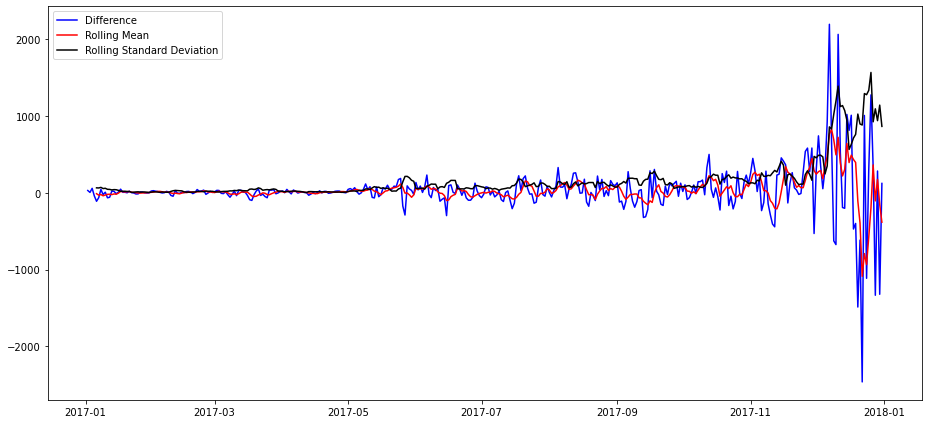

In [32]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_2017_daily_diff, color='blue',label='Difference')
ax.plot(diff_roll_mean, color='red', label='Rolling Mean')
ax.plot(diff_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

More or less stationary?

- 


In [33]:
# What if we logged the data?
logged_2017_daily = np.log1p(df_2017_daily['Open'])

In [34]:
# Now grabbing the rolling mean and std for the difference
log_roll_mean = logged_2017_daily.rolling(window=5, center=False).mean()
log_roll_std = logged_2017_daily.rolling(window=5, center=False).std()

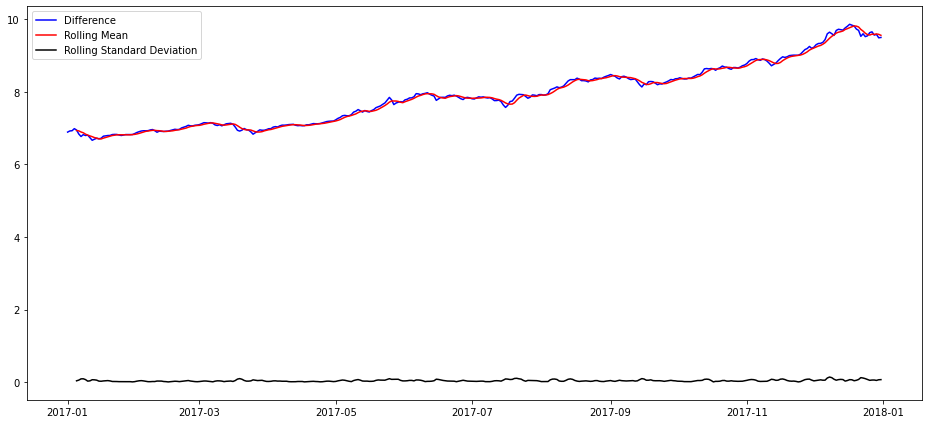

In [35]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(logged_2017_daily, color='blue',label='Difference')
ax.plot(log_roll_mean, color='red', label='Rolling Mean')
ax.plot(log_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

More or less stationary?

- 


Any further ideas? 

- 


## Now - Time to Model!

## Featuring: ARMA

### Autoregressive (AR)


An autoregressive (AR) model is when a value from a time series is regressed on previous values from the same time series.

In words, the mathematical idea is the following:

$$ \text{Today = Constant + Slope} \times \text{Yesterday + Noise} $$

Or, mathematically:
$$\large Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

### Moving Average (MA)

The Moving Average (MA) model can be described as the weighted sum of today's and yesterday's noise.

In words, the mathematical idea is the following:

$$ \text{Today = Mean + Noise + Slope} \times \text{Yesterday's Noise} $$

Or, mathematically:
$$\large Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$$


Some notes on these, based on the formulas:
- If the slope is 0, the time series is a white noise model with mean $\mu$
- If the slope is not 0, the time series is autocorrelated and depends on the previous white noise process
- Bigger slope means bigger autocorrelation
- When there is a negative slope, the time series follow an oscillatory process

In [36]:
# New dataset who dis
# Monthly Google search trends for 'taxes' in the US
df_taxes = pd.read_csv('data/google-trends_taxes_us.csv')

# Some quick clean up
df_taxes.columns = ['counts']
df_taxes = df_taxes.iloc[1:]
df_taxes['counts'] = df_taxes['counts'].str.replace('<1', '0').astype(int)
df_taxes.index = pd.to_datetime(df_taxes.index)

In [37]:
df_taxes.head()

,counts
2004-01-01,45
2004-02-01,54
2004-03-01,48
2004-04-01,56
2004-05-01,24


In [38]:
df_taxes.tail()

,counts
2019-01-01,78
2019-02-01,100
2019-03-01,70
2019-04-01,81
2019-05-01,35


<AxesSubplot:>

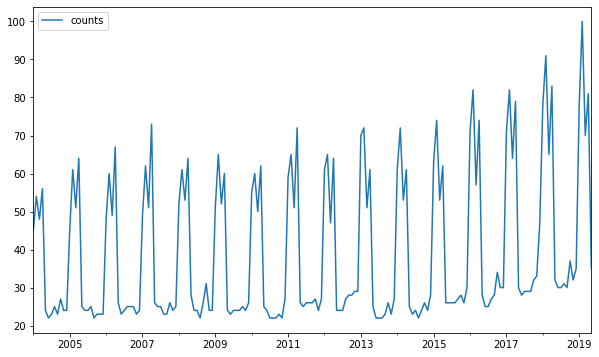

In [39]:
df_taxes.plot(figsize=(10,6))

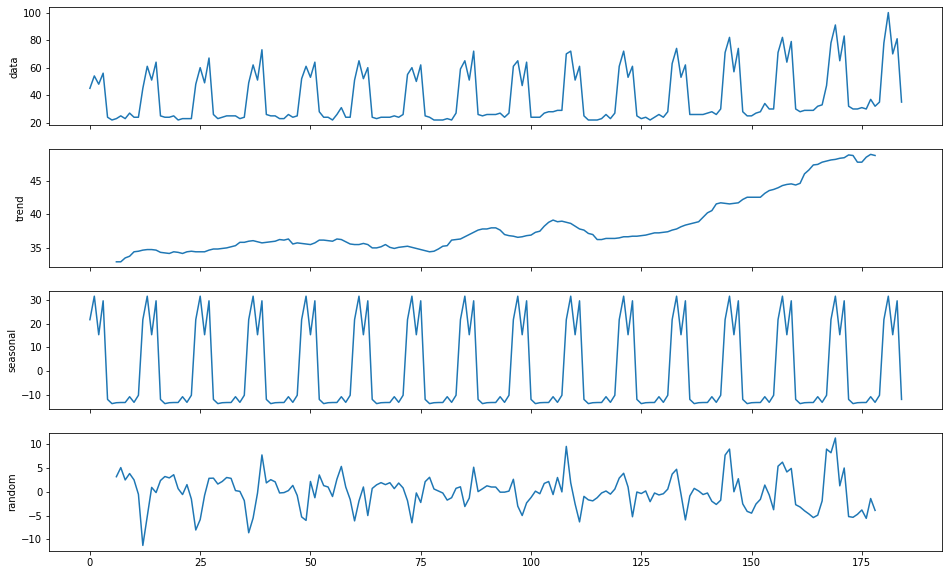

In [78]:
# Let's decompose this one

decomposed = decompose(df_taxes['counts'].values, 'additive', m=12)

decomposed_plot(decomposed, figure_kwargs={'figsize': (16, 10)})
plt.show()

## ARMA Modeling 

Once you determine if your time series is stationary, you can model. There are 4 key steps: 
1. Model Identification - where you determine the properties of a time series then chose a structural form. Remember you're treating the data as a series of random variables. The basic types of ARIMA models are: 
    - AutoRegressive(AR)
    - Moving Average(MA) 
    - Autoregressive Moving Average(ARMA)
    - AutoRegressive Integrated Moving Average 

A time series may be primarily an autoregressive, moving average or combination of both. To identify which it is, you need to plot 2 key functions.

    > Sample Autocorrelation Function(ACF) 
    > Sample Partial Autocorrelation Function(Partial ACF)
    
2. Parameter Estimation - Once you have identified the form of an ARIMA model, the next step is to estimate the coefficients or parameters of the model. You can use Regression and MLE to do this. 

3. Model Checking - The most widely used information criterion(checking the quality of your model) for Time series is AIC. You can compare different models with different numbers of lagged terms, white noise terms and how many times the time series was differenced and choose the model with the lowest AIC. 

4. Forecasting - Once the model is estimated you can forecast future values with the predict function. 

![](https://www.statisticshowto.com/wp-content/uploads/2016/11/lag-plot-linear.png)

## Autocorrelation and Partial Autocorrelation
The ACF shows the correlations between the elements of a time series as a function of their lags. The partial ACF shows the correlations between the elements of a time series for each lag, holding constant the impact of all other lags.

>The basic idea of autocorrelation is simple: See how a series correlates with a "lagged" version of itself. If my sequence is $S_0 = (x_0, x_1, x_2, ... , x_n)$, then I can measure the Pearson correlation(multicollinearity) between the first $n-k + 1$ terms of $S_0$ and $S_{lag} = (x_k, x_{k+1}, x_{k+2}, ... , x_n)$.


### Autocorrelation Function Plots

https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

> "The **autocorrelation function** is a function that represents autocorrelation of a time series as a function of the time lag."

The autocorrelation function tells interesting stories about trends and seasonality. For example, if the original time series repeats itself every five days, you would expect to see a spike in the autocorrelation function at 5 days.



In [40]:
df_taxes['counts']

2004-01-01     45
2004-02-01     54
2004-03-01     48
2004-04-01     56
2004-05-01     24
             ... 
2019-01-01     78
2019-02-01    100
2019-03-01     70
2019-04-01     81
2019-05-01     35
Name: counts, Length: 185, dtype: int64

In [41]:
df_taxes['lag 1'] = df_taxes['counts'].shift(1)

In [42]:
df_taxes['lag 12'] = df_taxes['counts'].shift(12)

In [43]:
df_taxes.head()

,counts,lag 1,lag 12
2004-01-01,45,NaN,NaN
2004-02-01,54,45.0,NaN
2004-03-01,48,54.0,NaN
2004-04-01,56,48.0,NaN
2004-05-01,24,56.0,NaN


In [44]:
df_taxes.corr()

,counts,lag 1,lag 12
counts,1.000000,0.592494,0.982597
lag 1,0.592494,1.000000,0.576508
lag 12,0.982597,0.576508,1.000000


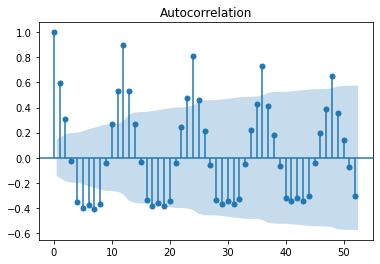

In [45]:
import statsmodels.graphics.tsaplots as tsa

tsa.plot_acf(df_taxes['counts'],lags=52);

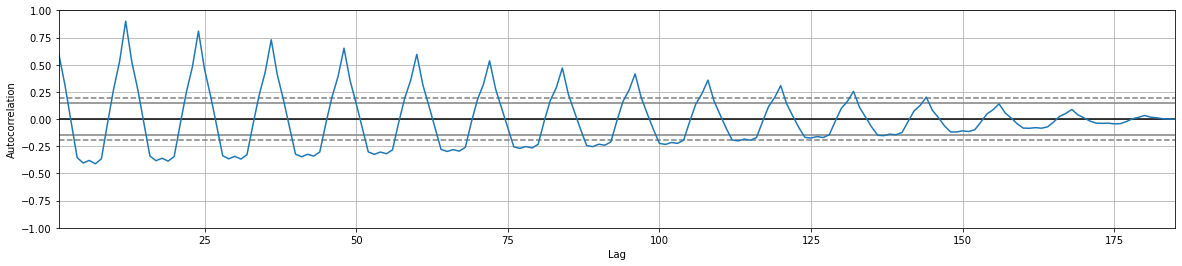

In [46]:
# Another view
plt.figure(figsize=(20, 4))
pd.plotting.autocorrelation_plot(df_taxes['counts']);

The horizontal bands represent condfidence intervals, which are calculated by taking relevant z-scores of the standard normal distribution and dividing by the square root of the number of observations. What do these intervals mean? - anything outside confidence interval means not due to chance - reject null. 


### Partial-Autocorrelation Function Plot


> "The **partial autocorrelation function** can be interpreted as a regression of the series against its past lags.
 
 > It helps you come up with a possible order for the auto regressive term. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant. "

The idea behind partial Autocorrelation is to compare a series to a lagged version of itself while abstracting away from intermediate values. In effect, this amounts to exploring the correlations among residuals

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


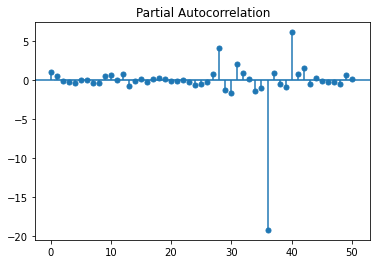

In [47]:
tsa.plot_pacf(df_taxes['counts'],lags=50);

# ARIMA MODELS:


## The ARIMA Time Series Model

One of the most common methods used in time series forecasting is known as the ARIMA model, which stands for **AutoregRessive Integrated Moving Average**. ARIMA is a model that can be fitted to time series data in order to better understand or predict future points in the series.

Let's have a quick introduction to ARIMA. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

### Number of AR (Auto-Regressive) terms (p): 

`p` is the auto-regressive part of the model. It allows us to incorporate the effect of past values into our model. Intuitively, this would be similar to stating that it is likely to rain tomorrow if it has been raining for past 3 days. AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

### Number of Differences (d):

`d` is the **Integrated** component of an ARIMA model. This value is concerned with the amount of differencing as it identifies the number of lag values to subtract from the current observation. Intuitively, this would be similar to stating that it is likely to rain tomorrow if the difference in amount of rain in the last *n* days is small. 

### Number of MA (Moving Average) terms (q): 

`q` is the moving average part of the model which is used to set the error of the model as a linear combination of the error values observed at previous time points in the past. MA terms form lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where `e(i)` is the difference between the moving average at ith instant and actual value.

These three distinct integer values, (p, d, q), are used to parametrize ARIMA models. Because of that, ARIMA models are denoted with the notation `ARIMA(p, d, q)`. Together these three parameters account for seasonality, trend, and noise in datasets:

* `(p, d, q)` are the non-seasonal parameters described above.
* `(P, D, Q)` follow the same definition but are applied to the seasonal component of the time series. 
* The term `s` is the periodicity of the time series (4 for quarterly periods, 12 for yearly periods, etc.).

A detailed article on these parameters is available [HERE](https://www.quantstart.com/articles/Autoregressive-Integrated-Moving-Average-ARIMA-p-d-q-Models-for-Time-Series-Analysis).

The seasonal ARIMA method can appear daunting because of the multiple tuning parameters involved. In the next section, we will describe how to automate the process of identifying the optimal set of parameters for the seasonal ARIMA time series model.

What you generally will try to do for any time series analysis is:

- Detrend your time series using differencing. ARMA models represent stationary processes, so we have to make sure there are no trends in our time series
- Look at ACF and PACF of the time series
- Decide on the AR, MA, and order of these models
- Fit the model to get the correct parameters and use for prediction

In [48]:
# metrics
from sklearn import metrics

# Note - we're back to regression metrics!
def report_metrics(y_true, y_pred):
    print("Explained Variance:\n\t", metrics.explained_variance_score(y_true, y_pred))
    print("MAE:\n\t", metrics.mean_absolute_error(y_true, y_pred))
    print("RMSE:\n\t", metrics.mean_squared_error(y_true, y_pred, squared=False))
    print("r^2:\n\t", metrics.r2_score(y_true, y_pred))

In [49]:
# Getting rid of those earlier lag cols
df_taxes = df_taxes.drop(columns=['lag 1', 'lag 12'])

In [50]:
# Back to taxes
# Let's create a time period tracker - incrementing each instance
df_taxes.insert(0, 't', range(len(df_taxes)))

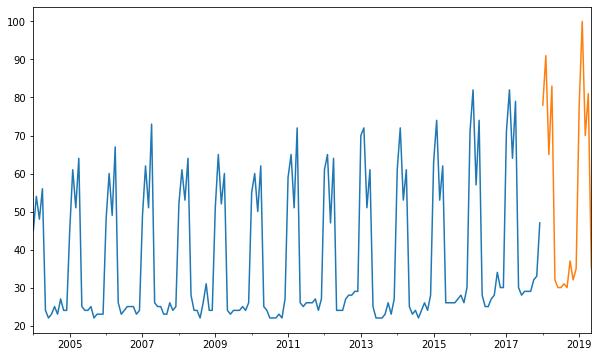

In [51]:
# Let's create a target area
df_taxes['future'] = (df_taxes.index.year > 2017).astype('int')

# Now plot
plt.figure(figsize=(10,6))
df_taxes.loc[df_taxes.future == 0, 'counts'].plot()
df_taxes.loc[df_taxes.future == 1, 'counts'].plot()
plt.show()

In [52]:
# Here, just using the instance as our "X" - not really what we're using to predict
# But - this is setting us up for something later
X_train = df_taxes.loc[df_taxes.future == 0, 't'].values.reshape(-1, 1)
X_test = df_taxes.loc[df_taxes.future == 1, 't'].values.reshape(-1, 1)
# Our train set is our actual value in the series
y_train = df_taxes.loc[df_taxes.future == 0, 'counts'].values
y_test = df_taxes.loc[df_taxes.future == 1, 'counts'].values

#### What's the most naive way to make a prediction?

Average of the values in the train set - idea from Mooney

In [53]:
mean_val = df_taxes.loc[df_taxes.future == 0]['counts'].mean()

In [54]:
y_pred = [mean_val] * len(y_test)

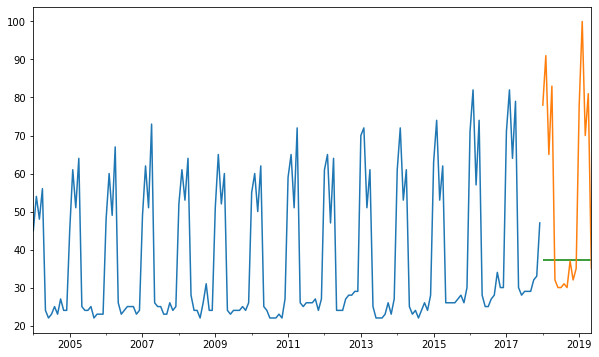

In [55]:
# Let's create a target area
df_taxes['future'] = (df_taxes.index.year > 2017).astype('int')

# Now plot
plt.figure(figsize=(10,6))
df_taxes.loc[df_taxes.future == 0, 'counts'].plot()
df_taxes.loc[df_taxes.future == 1, 'counts'].plot()

plt.hlines(y=mean_val, 
           xmin = df_taxes.loc[df_taxes.future == 1].index[0], 
           xmax = df_taxes.loc[df_taxes.future == 1].index[-1],
           color='green')

plt.show()

In [56]:
report_metrics(y_test, y_pred)

Explained Variance:
	 0.0
MAE:
	 23.010854341736692
RMSE:
	 30.964441769201944
r^2:
	 -0.5097103248808332


Predicting the last value

In [57]:
pred_val = y_train[len(y_train)-1]
y_pred = [pred_val] * len(y_test)
pred_val

47

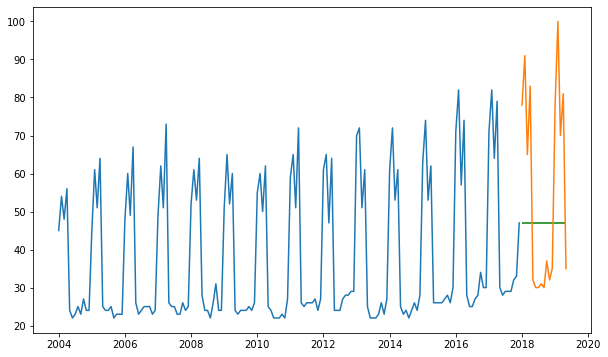

In [58]:
plt.figure(figsize=(10,6))
plt.plot(df_taxes.loc[df_taxes.future == 0]['counts'])
plt.plot(df_taxes.loc[df_taxes.future == 1]['counts'])

plt.hlines(y=pred_val, 
           xmin=df_taxes.loc[df_taxes.future == 1].index[0], 
           xmax = df_taxes.loc[df_taxes.future == 1].index[-1],
           color='green')


plt.show()

In [59]:
report_metrics(y_test, y_pred)

Explained Variance:
	 0.0
MAE:
	 23.58823529411765
RMSE:
	 26.494172500204424
r^2:
	 -0.10526860629835455


Thoughts? 

- 


In [60]:
# linear trend approach
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_trend = lr.predict(X_train)

In [61]:
y_pred

array([40.51568292, 40.55510492, 40.59452692, 40.63394892, 40.67337093,
       40.71279293, 40.75221493, 40.79163693, 40.83105893, 40.87048093,
       40.90990293, 40.94932493, 40.98874694, 41.02816894, 41.06759094,
       41.10701294, 41.14643494])

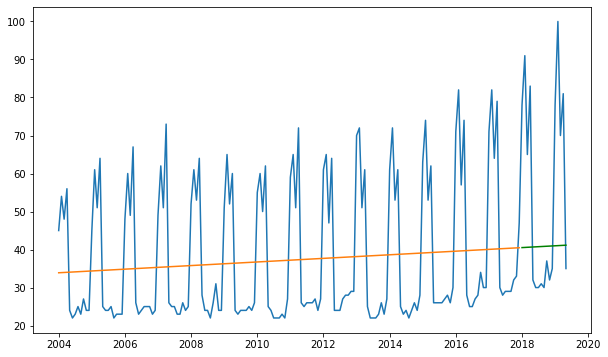

In [63]:
plt.figure(figsize=(10,6))
plt.plot(df_taxes['counts'])
plt.plot(df_taxes.loc[df_taxes.future == 0].index, y_trend)
plt.plot(df_taxes.loc[df_taxes.future == 1].index, y_pred, color='green')
plt.show()

In [64]:
report_metrics(y_test, y_pred)

Explained Variance:
	 -0.000715977559534231
MAE:
	 23.243907937692313
RMSE:
	 29.005724409353874
r^2:
	 -0.3247518907038842


### PMDArima - Using their Auto ARIMA! 

Basically, grid search for ARIMA

In [66]:
# remember this was broken? I set train_size to 17 before, instead of test size :sigh:
train, test = model_selection.train_test_split(df_taxes['counts'], test_size=17)

In [87]:
train.head()

2004-01-01    45
2004-02-01    54
2004-03-01    48
2004-04-01    56
2004-05-01    24
Name: counts, dtype: int64

In [85]:
# checking stationarity
from pmdarima.arima.stationarity import ADFTest

# beyond statsmodels
adf_test = ADFTest(alpha=0.05)
p_val, should_diff = adf_test.should_diff(df_taxes['counts'])  # (0.01, False)

print(f"P-Value: {p_val}, so should you difference the data? {should_diff}")

P-Value: 0.01, so should you difference the data? False


In [68]:
# time to model!
arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=100,
                      seasonal=True, m=12) 

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=807.959, Time=1.68 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=836.996, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=809.988, Time=0.11 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=815.075, Time=0.11 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=847.586, Time=0.01 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=808.559, Time=1.20 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=813.244, Time=0.47 sec
 ARIMA(2,0,2)(2,1,1)[12] intercept   : AIC=808.472, Time=4.63 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=809.336, Time=4.30 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=816.949, Time=0.22 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=807.352, Time=2.88 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=806.663, Time=0.70 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=807.851, Time=0.34 sec
 ARIMA(1,0,2)(1,1,2)[12] intercept   : AIC=808.596, Time=1.16 sec
 ARIMA(1,0,2)(1,1,1)[12] intercep

In [86]:
# check the output summary
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  168
Model:             SARIMAX(1, 0, 0)x(0, 1, [1, 2], 12)   Log Likelihood                -397.122
Date:                                 Wed, 14 Apr 2021   AIC                            804.245
Time:                                         21:39:43   BIC                            819.494
Sample:                                              0   HQIC                           810.438
                                                 - 168                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4827      0.191      2.533      0.011       0.109       0.856
ar.L1          0.4667      0.082      5.678      0.000       0.306       0.628
ma.S.L12      -0.3146      0.077     -4.076      0.000      -0.466      -0.163
ma.S.L24      -0.1666      0.084     -1.994      0.046      -0.330      -0.003
sigma2         9.3536      0.804     11.635      0.000       7.778      10.929
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                96.61
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               1.42   Skew:                             1.07
Prob(H) (two-sided):                  0.21   Kurtosis:                         6.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
y_pred = arima.predict(n_periods=test.shape[0])

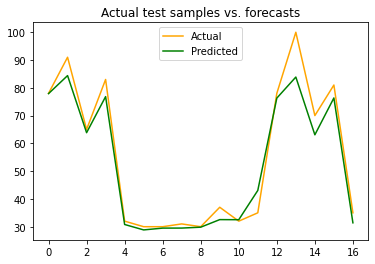

In [88]:
# Plot actual test vs. forecasts:
x = np.arange(test.shape[0])
plt.plot(x, test, color='orange', label='Actual')
plt.plot(x, arima.predict(n_periods=test.shape[0]), color='green', label='Predicted')
plt.title('Actual test samples vs. forecasts')
plt.legend()
plt.show()

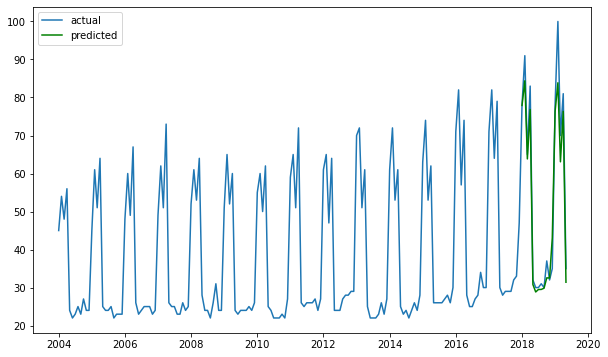

In [71]:
plt.figure(figsize=(10,6))
plt.plot(df_taxes['counts'], label = 'actual')
plt.plot(df_taxes.loc[df_taxes.future == 1].index, y_pred, color='green', label = 'predicted')
plt.legend()
plt.show()

In [72]:
report_metrics(y_test, y_pred)

Explained Variance:
	 0.9642132878243451
MAE:
	 3.7993892770828848
RMSE:
	 5.524276114096202
r^2:
	 0.9519472916911864


Thoughts?

- 


More from the documentation: https://alkaline-ml.com/pmdarima/tips_and_tricks.html#understand-p-d-and-q

> ARIMA models are made up of three different terms:
> 
> p: The order of the auto-regressive (AR) model (i.e., the number of lag observations). A time series is considered AR when previous values in the time series are very predictive of later values. An AR process will show a very gradual decrease in the ACF plot.
> 
> d: The degree of differencing.
> 
> q: The order of the moving average (MA) model. This is essentially the size of the “window” function over your time series data. An MA process is a linear combination of past errors.

OR:

> Seasonal ARIMA models have three parameters that heavily resemble our p, d and q parameters:
> 
> P: The order of the seasonal component for the auto-regressive (AR) model.
> 
> D: The integration order of the seasonal process.
> 
> Q: The order of the seasonal component of the moving average (MA) model.
> 
> P and Q and be estimated similarly to p and q via auto_arima, and D can be estimated via a Canova-Hansen test, however m generally requires subject matter knowledge of the data.

More gems at the end for those digging back into this notebook:

`pmdarima` has a set of tips and tricks: https://alkaline-ml.com/pmdarima/tips_and_tricks.html

Also:

- https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd
- https://machinelearningmastery.com/develop-arch-and-garch-models-for-time-series-forecasting-in-python/

And, what I'm really looking into right now:
- https://towardsdatascience.com/sktime-a-unified-python-library-for-time-series-machine-learning-3c103c139a55